In [1]:
import random
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import math
import time

## A. Algorithm Implementation

In [2]:
def insertionSort(A: list) -> tuple:
    cnt = 0
    for i in range(1, len(A)):
        for j in range(i, 0, -1):
            # counts key comparisons 
            cnt += 1
            if A[j] < A[j - 1]:
                A[j], A[j - 1] = A[j - 1], A[j]
            else:
                break
    return (A, cnt)

In [3]:
def merge(A: list, B: list) -> tuple:
    # a stores index of A, b stores index of B, cnt is key comparisons
    a, b, cnt = 0, 0, 0
    ret = []
    while a < len(A) and b < len(B):
        cnt += 1
        if A[a] < B[b]:
            ret.append(A[a])
            a += 1
        else:
            ret.append(B[b])
            b += 1
    while a < len(A):
        ret.append(A[a])
        a += 1
    while b < len(B):
        ret.append(B[b])
        b += 1
    return (ret, cnt)
        
def mergeSort(A: list) -> tuple:
    if len(A) <= 1:
        return (A, 0)
    l, r = 0, len(A) - 1
    mid = (l + r) // 2 + 1
    L, cnt_l = mergeSort(A[:mid])
    R, cnt_r = mergeSort(A[mid:])
    A, cnt_merge = merge(L, R)
    return (A, cnt_l + cnt_r + cnt_merge)

In [4]:
def hybridSort(A: list, S: int) -> tuple:
    if len(A) <= S:
        return insertionSort(A)
    elif len(A) <= 1:
        return (A, 0)
    l, r = 0, len(A) - 1
    mid = (l + r) // 2 + 1
    L, cnt_l = hybridSort(A[:mid], S)
    R, cnt_r = hybridSort(A[mid:], S)
    A, cnt_merge = merge(L, R)
    return (A, cnt_l + cnt_r + cnt_merge)

In [5]:
def hybridTest(A: list):
    tmp = A.copy()
    print("S\tKey Comparisons")
    for s in range(len(A) + 1):
        A = tmp
        print(f"{s}\t{hybridSort(A, s)[1]}")

In [6]:
A = [5, 2, 4, 2, 1]
insertionSort(A)

([1, 2, 2, 4, 5], 10)

In [7]:
A = [14, 40, 31, 28, 3, 15, 17, 51]
mergeSort(A)

([3, 14, 15, 17, 28, 31, 40, 51], 16)

In [8]:
A = [14, 40, 31, 28, 3, 15, 17, 51]
hybridSort(A, 2)

([3, 14, 15, 17, 28, 31, 40, 51], 16)

In [9]:
A = [23, 23, 23, 23, 23, 23, 23, 23]
hybridSort(A, 2)

([23, 23, 23, 23, 23, 23, 23, 23], 12)

In [10]:
hybridTest(A)

S	Key Comparisons
0	12
1	12
2	12
3	12
4	10
5	10
6	10
7	10
8	7


## B. Generate Input Data

In [11]:
data_sizes = [1000 * 10 ** i for i in range(5)]

# Generate the data, from 1000 to 10million
datasets = []
for size in data_sizes:
    A = [random.randint(1, size) for _ in range(size)]
    datasets.append(A)

## C. Analysis

### (i) Fixed `S = 300`

In [12]:
S = 300
key_comparisons = []

for A in datasets:
    sortedA, cnt = hybridSort(A, S)
    key_comparisons.append(cnt)

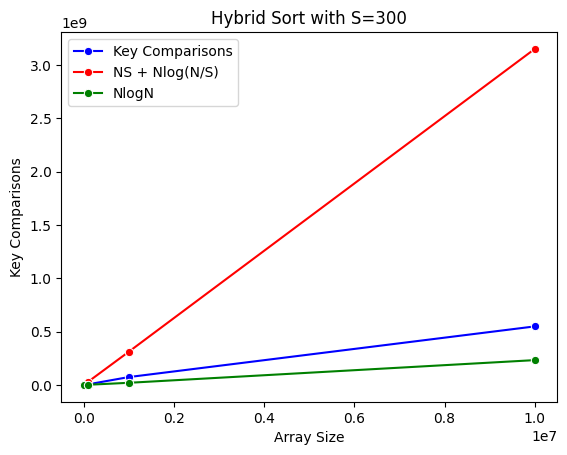

In [13]:
# in theory, function should be O(nS + nlog(n / S))
theoretical_values = [n * S + n * math.log2(n / S) for n in data_sizes]
nlogn = [n * math.log2(n) for n in data_sizes]

# Plot the actual key comparisons
sb.lineplot(x=data_sizes, y=key_comparisons, marker="o", color='blue', label="Key Comparisons")
sb.lineplot(x=data_sizes, y=theoretical_values, marker="o", color='red', label="NS + Nlog(N/S)")
sb.lineplot(x=data_sizes, y=nlogn, marker="o", color='green', label="NlogN")

plt.xlabel("Array Size")
plt.ylabel("Key Comparisons")
plt.title("Hybrid Sort with S=300")
plt.legend()
plt.show()

### (ii) Fixed `N = 100000`

In [14]:
n = 100000
A = [random.randint(1, n) for _ in range(n)]
S_range = range(1, 301)
second_key_comparisons = []

for S in S_range:
    sortedA, cnt = hybridSort(A, S)
    second_key_comparisons.append(cnt)

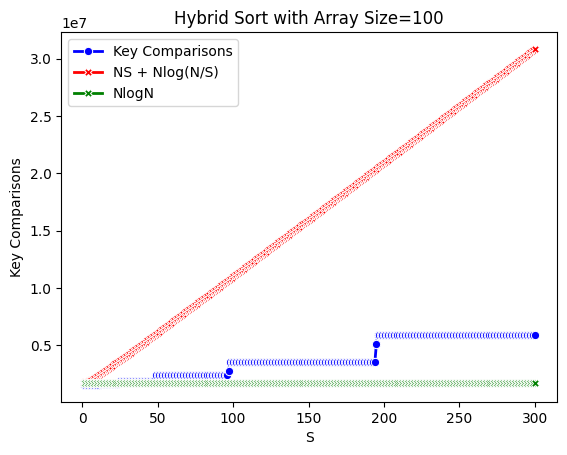

In [15]:
second_theoretical_values = [n * S + n * math.log2(n / S) for S in S_range]
nlogn = [n * math.log2(n) for _ in S_range]

# caclulate the number of key comparisons
sb.lineplot(x=S_range, y=second_key_comparisons, marker='o', linewidth=2, color='blue', label="Key Comparisons")
sb.lineplot(x=S_range, y=second_theoretical_values, marker='X', linewidth=2, color='red', label="NS + Nlog(N/S)")
sb.lineplot(x=S_range, y=nlogn, marker='X', linewidth=2, color='green', label="NlogN")
plt.xlabel("S")
plt.ylabel("Key Comparisons")
plt.title("Hybrid Sort with Array Size=100")
plt.show()

### (iii) Find Optimal `S`

In [16]:
# we will plot total comparisons against S
upper_S = 101
comparisons = []
times = []
i = 0

# we do a linear search from [1, 100] for S for each dataset
for data in datasets:
    mn_cnt, mn_time = -1, -1
    S_cnt, S_time = 0, 0
    comparisons.append([])
    times.append([])
    print(f"N = {len(data)}:")
    for S in range(1, upper_S):
        total = 0
        start_time = time.perf_counter()
        sortedA, cnt = hybridSort(data, S)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        if mn_cnt == -1 or mn_cnt > cnt:
            mn_cnt = cnt
            S_cnt = S
        if mn_time == -1 or mn_time > total_time:
            mn_time = total_time
            S_time = S
        comparisons[i].append(cnt)
        times[i].append(total_time)
        if S % 20 == 0:
            print(f"Running S = {S}...")
    i += 1
    print(f"\n\t\tBy Key Comparisons\tBy Runtime")
    print(f"Optimal S\t{S_cnt}\t\t\t{S_time}\n")

N = 1000:
Running S = 20...
Running S = 40...
Running S = 60...
Running S = 80...
Running S = 100...

		By Key Comparisons	By Runtime
Optimal S	1			14

N = 10000:
Running S = 20...
Running S = 40...
Running S = 60...
Running S = 80...
Running S = 100...

		By Key Comparisons	By Runtime
Optimal S	1			13

N = 100000:
Running S = 20...
Running S = 40...
Running S = 60...
Running S = 80...
Running S = 100...

		By Key Comparisons	By Runtime
Optimal S	3			20

N = 1000000:
Running S = 20...
Running S = 40...
Running S = 60...
Running S = 80...
Running S = 100...

		By Key Comparisons	By Runtime
Optimal S	1			12

N = 10000000:
Running S = 20...
Running S = 40...
Running S = 60...
Running S = 80...
Running S = 100...

		By Key Comparisons	By Runtime
Optimal S	3			17



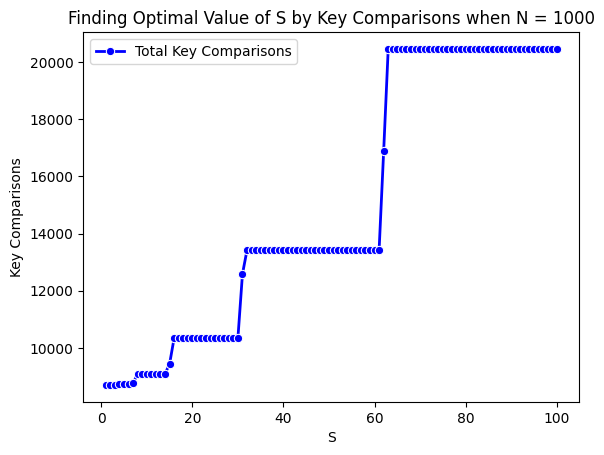

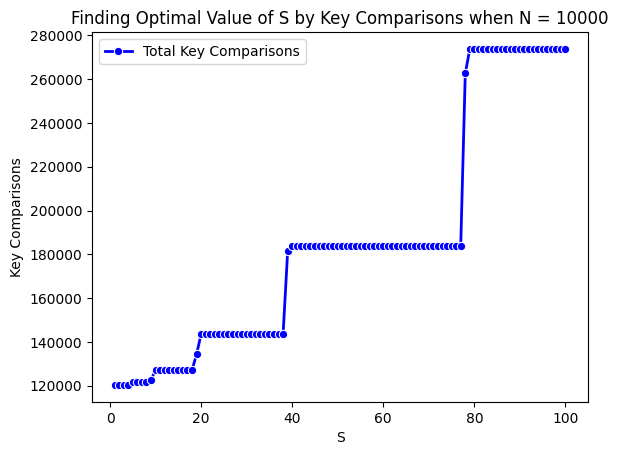

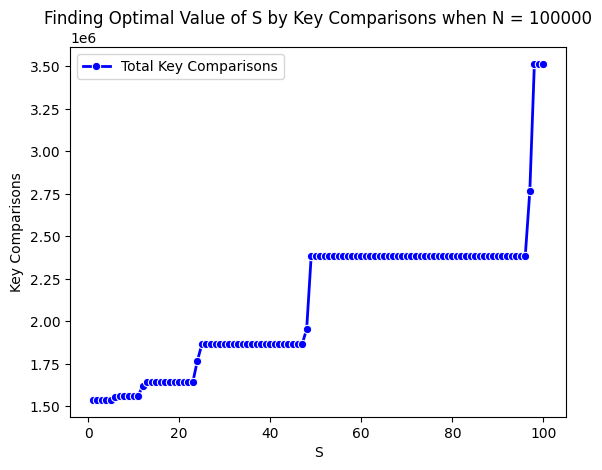

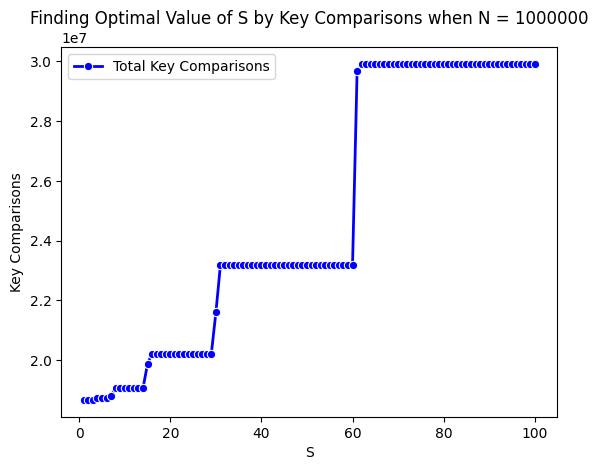

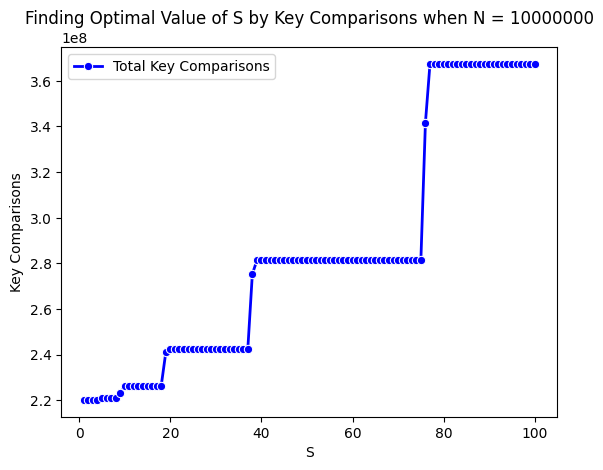

In [19]:
# plot S vs Key Comp
for i in range(5):
    sb.lineplot(x=range(1, upper_S), y=comparisons[i], marker='o', linewidth=2, color='blue', label=f"Total Key Comparisons")
    plt.xlabel("S")
    plt.ylabel("Key Comparisons")
    plt.title(f"Finding Optimal Value of S by Key Comparisons when N = {1000 * 10 ** i}")
    plt.show()

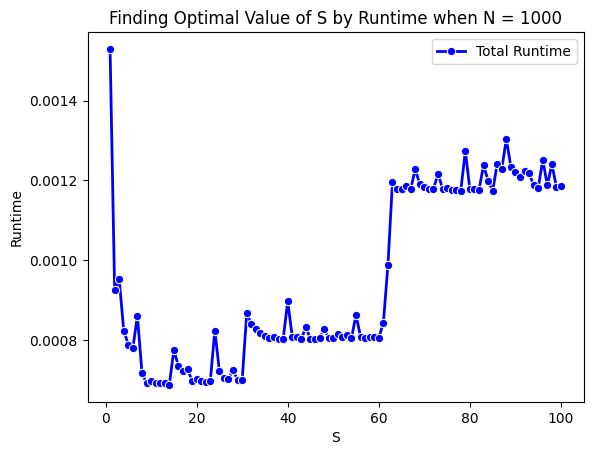

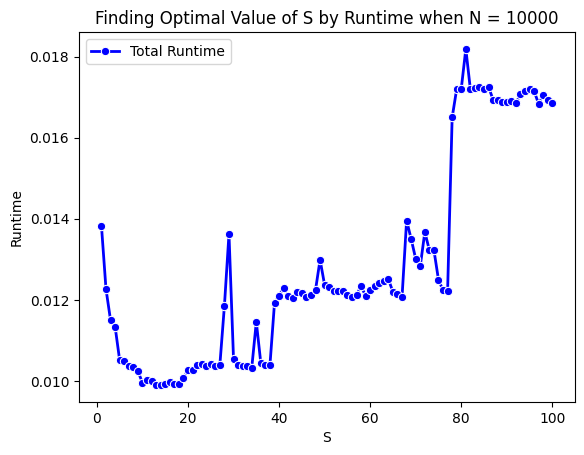

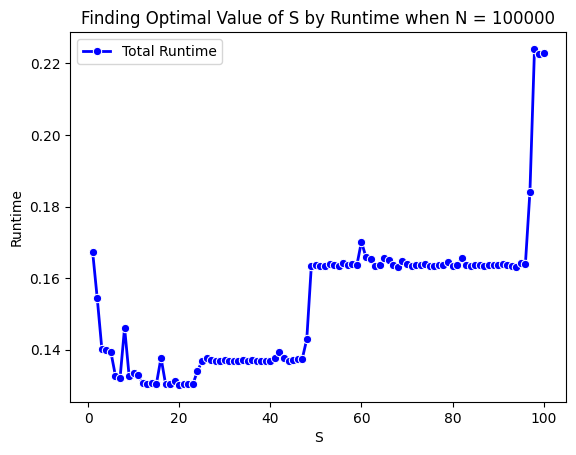

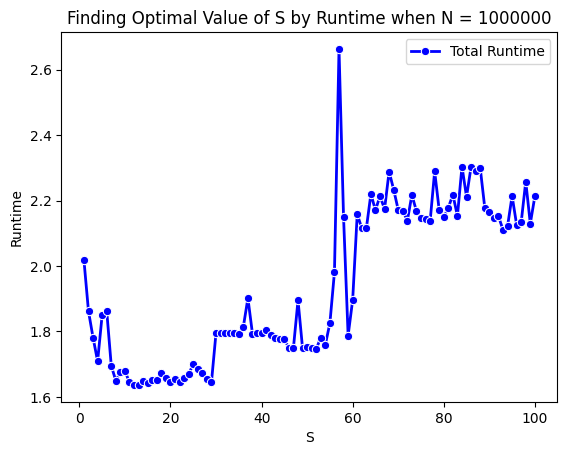

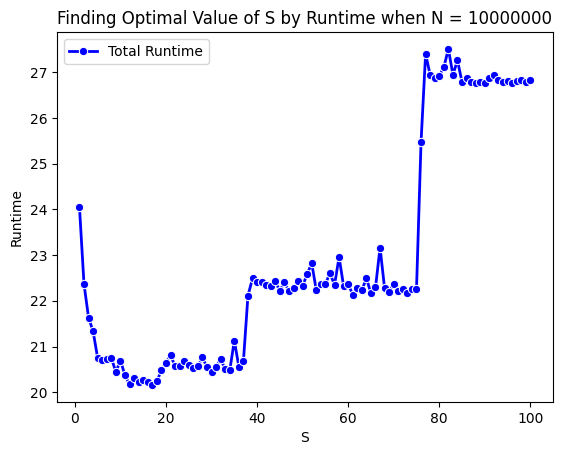

In [21]:
# plot S vs Runtime
for i in range(5):
    sb.lineplot(x=range(1, upper_S), y=times[i], marker='o', linewidth=2, color='blue', label=f"Total Runtime")
    plt.xlabel("S")
    plt.ylabel("Runtime")
    plt.title(f"Finding Optimal Value of S by Runtime when N = {1000 * 10 ** i}")
    plt.show()

In [22]:
x = 10000000
final_dataset = [random.randint(1, x) for i in range(x)] # 10 mil datapoints

In [23]:
optimal_S = 17
start = time.perf_counter()
sortedA, cnt = hybridSort(final_dataset, optimal_S)
end = time.perf_counter()

print(f"Elapsed Time: {end - start} seconds")
print(f"Key Comparisons: {cnt}")

Elapsed Time: 23.27068233297905 seconds
Key Comparisons: 226414064


In [24]:
start = time.perf_counter()
# Run your algorithm
sortedA, cnt = mergeSort(final_dataset)
end = time.perf_counter()

print(f"Elapsed Time: {end - start} seconds")
print(f"Key Comparisons: {cnt}")

Elapsed Time: 26.085404250014108 seconds
Key Comparisons: 220102843
